<a href="https://colab.research.google.com/github/ibrahimmhammed/projects/blob/main/Car_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


**Reading File**

In [ ]:
data = pd.read_csv("//content//car_price_prediction.csv")

**Data Exploration & Cleaning**

In [ ]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
data.shape

(19237, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
data.duplicated().sum()

313

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

**Data Analysis**

In [ ]:
for column in data.columns:        #counting all unique values in all columns
  print(column, ":", data[column].nunique())


ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


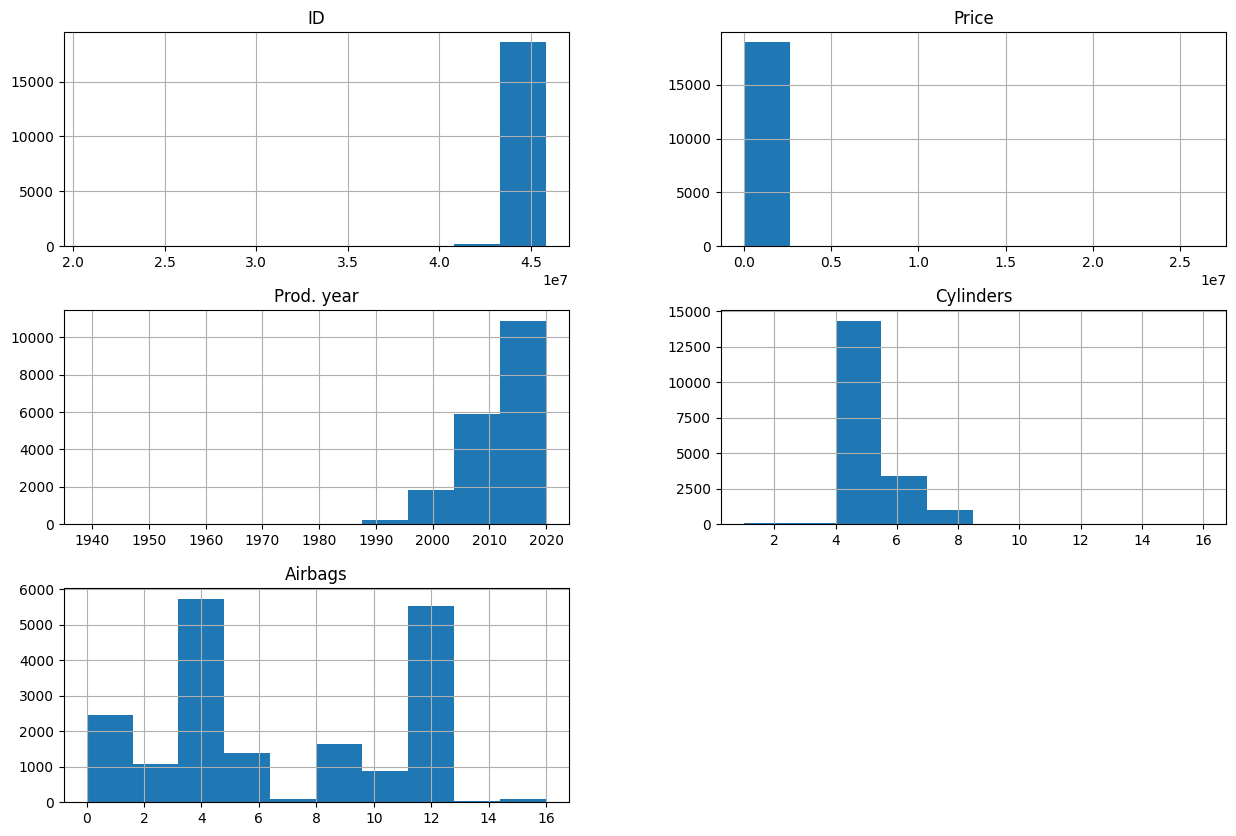

In [ ]:
data.hist(bins=10,figsize=(15,10))
plt.show()

In [ ]:
top_10_cars = data["Manufacturer"].value_counts().sort_values(ascending=False)[:10] #top 10 cars we have
top_10_cars

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: Manufacturer, dtype: int64

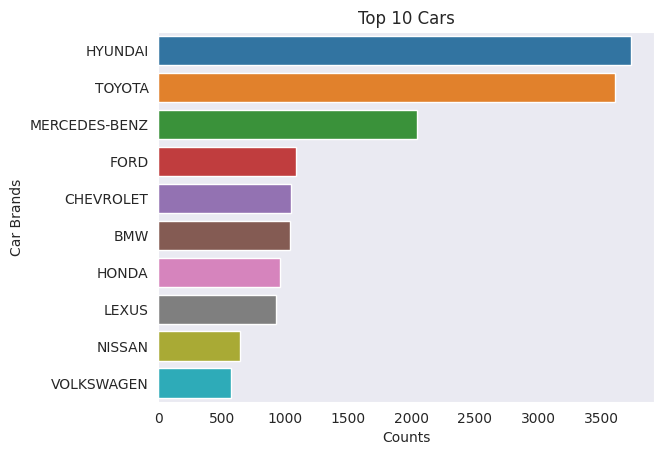

In [ ]:
car_brands = ['HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ', 'FORD', 'CHEVROLET', 'BMW', 'HONDA', 'LEXUS', 'NISSAN', 'VOLKSWAGEN']
car_counts = [3729, 3606, 2043, 1088, 1047, 1036, 960, 927, 645, 571]

# Set the style
sns.set_style("dark")


# Create the bar plot
sns.barplot(x=car_counts, y=car_brands)

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Car Brands')
plt.title('Top 10 Cars')

# Display the plot
plt.show()


In [ ]:
top_10_mean_prices = [data[data["Manufacturer"] == i]["Price"].mean() for i in list(top_10_cars.index)] #calculating the average price for each manufacture
top_10_mean_prices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

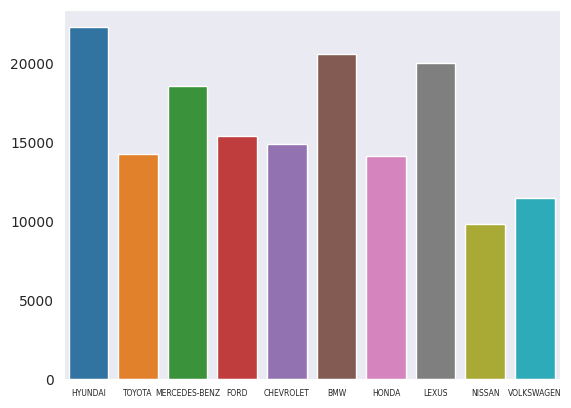

In [ ]:
# Create the bar plot
sns.barplot(x=top_10_cars.index, y=top_10_mean_prices)

# Set the font size on the x-axis
plt.xticks(fontsize=5.5)

# Display the plot
plt.show()

In [ ]:
cor=data.corr()  #meausring correlation
cor

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


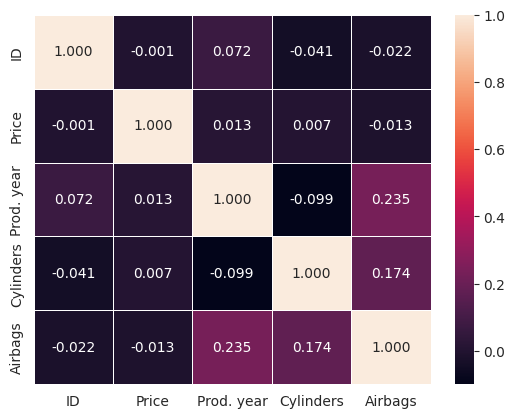

In [ ]:
sns.heatmap(cor,annot=True,linewidth=0.5,fmt=".3f")
plt.show()

In [ ]:
data_object = data.select_dtypes(include="object")
data_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              18924 non-null  object
 1   Manufacturer      18924 non-null  object
 2   Model             18924 non-null  object
 3   Category          18924 non-null  object
 4   Leather interior  18924 non-null  object
 5   Fuel type         18924 non-null  object
 6   Engine volume     18924 non-null  object
 7   Mileage           18924 non-null  object
 8   Gear box type     18924 non-null  object
 9   Drive wheels      18924 non-null  object
 10  Doors             18924 non-null  object
 11  Wheel             18924 non-null  object
 12  Color             18924 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


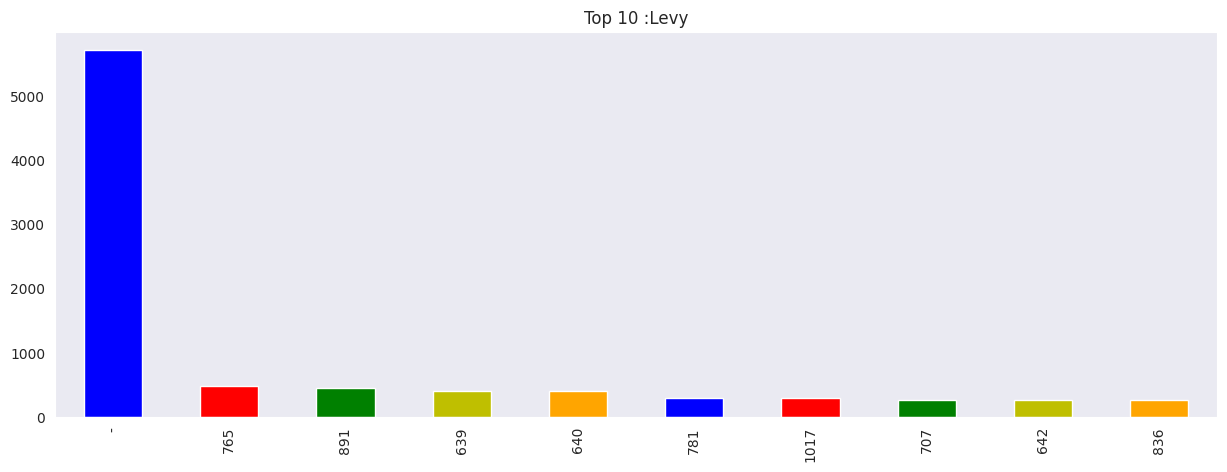

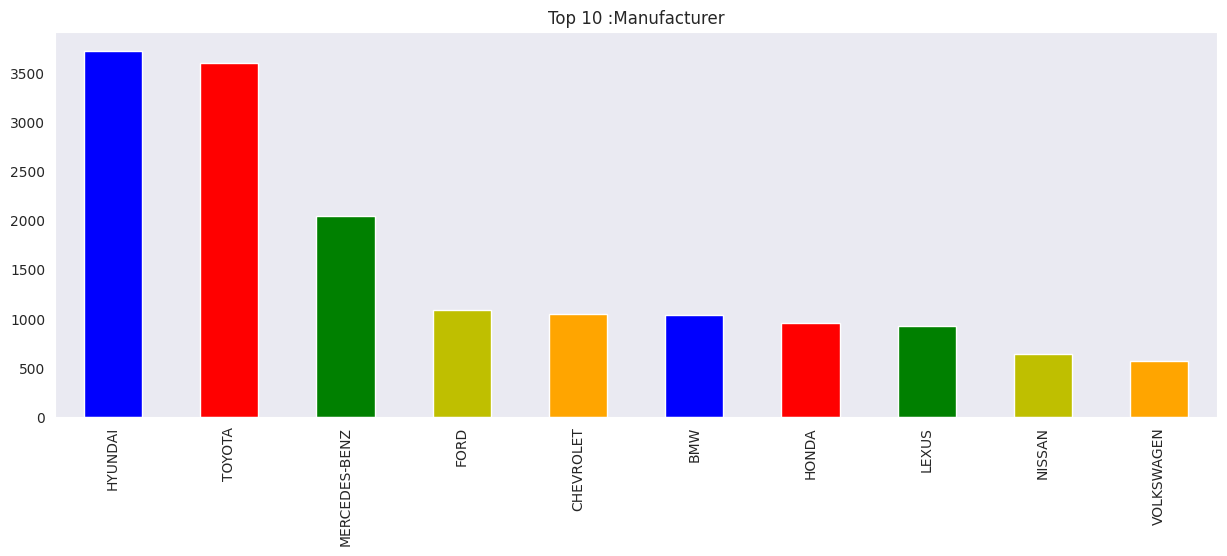

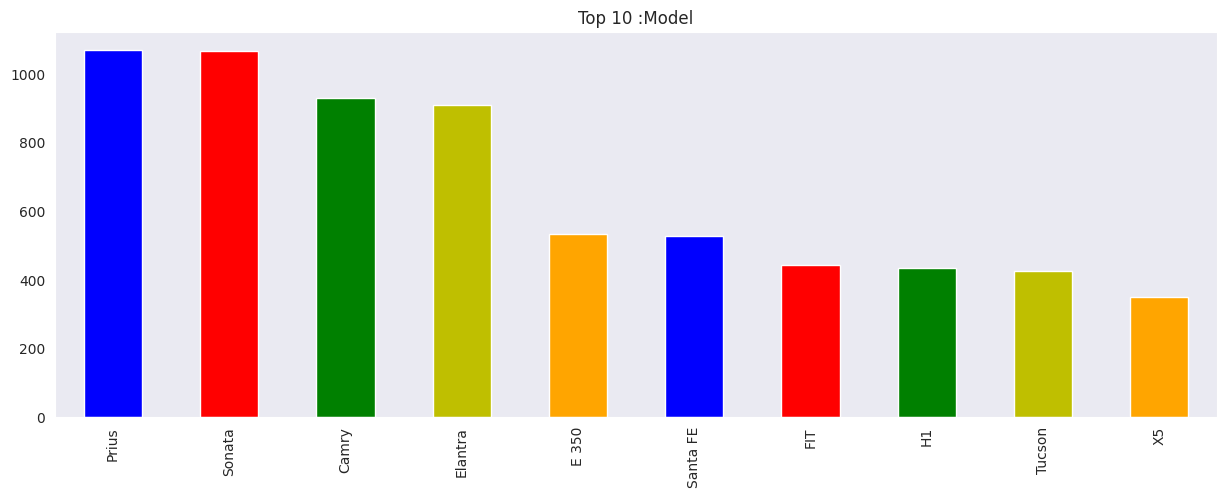

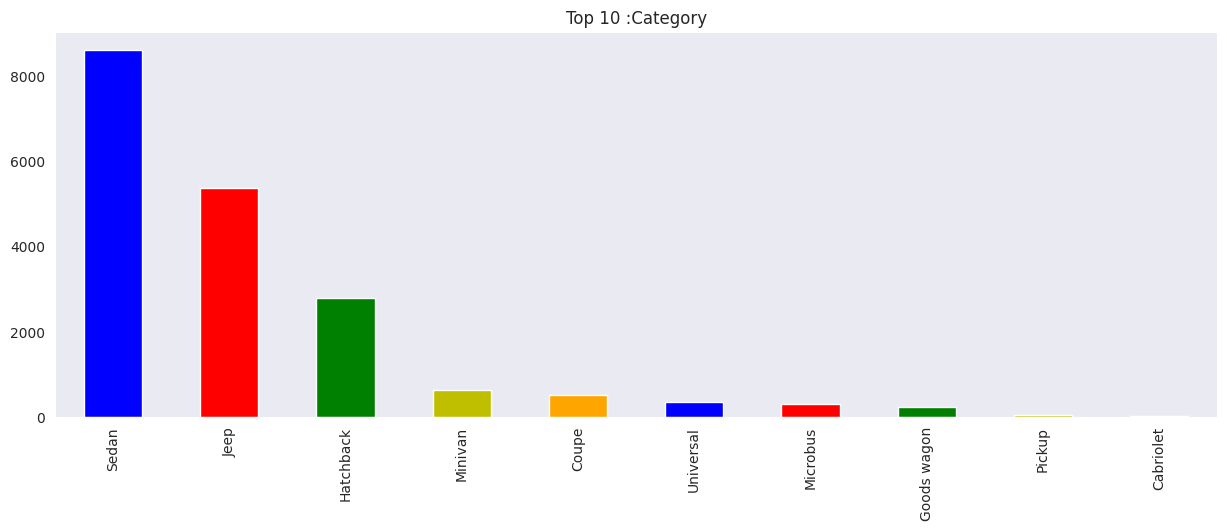

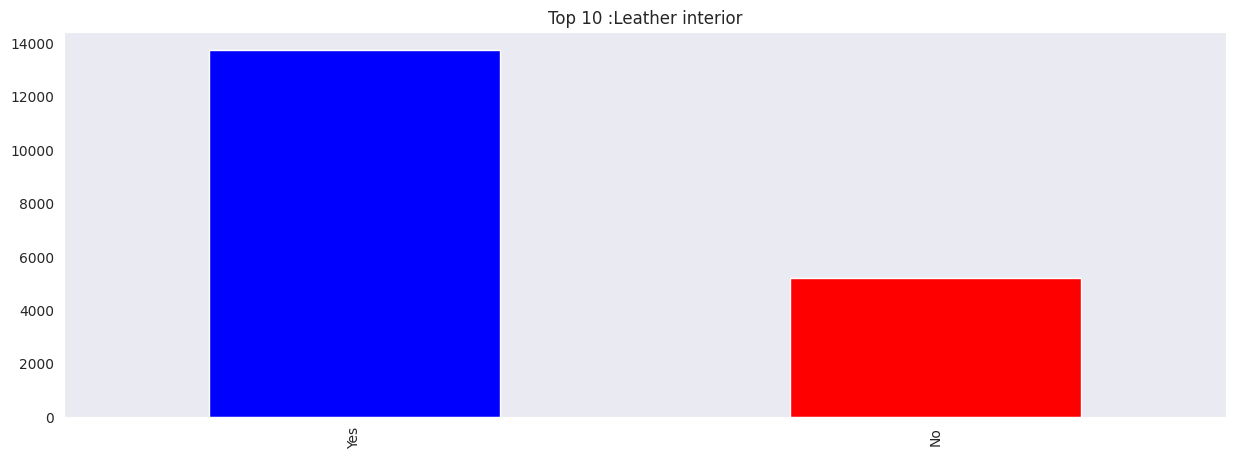

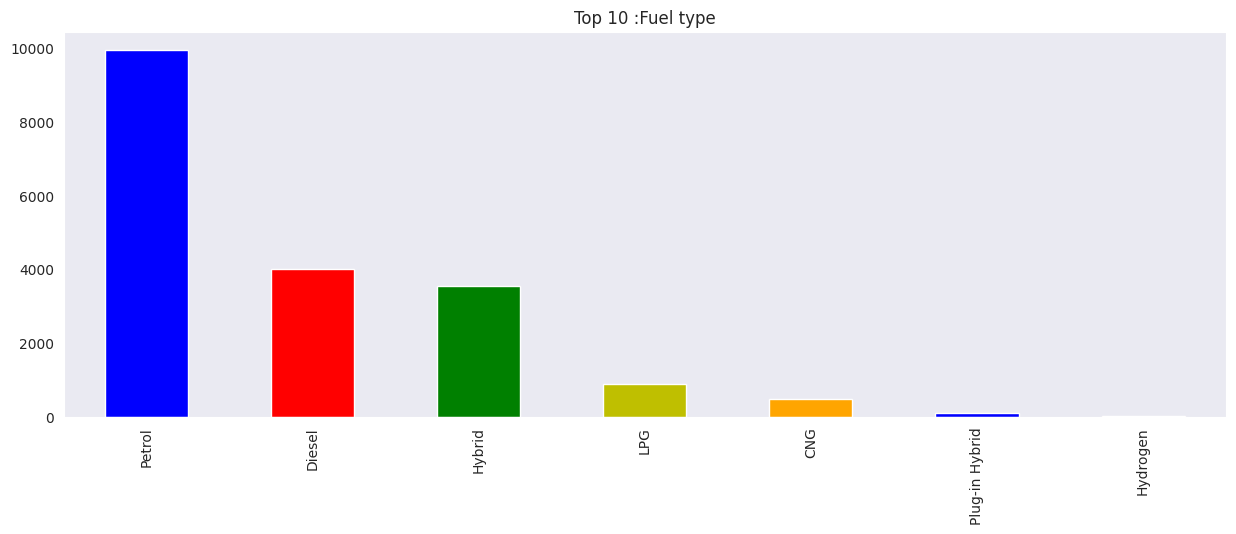

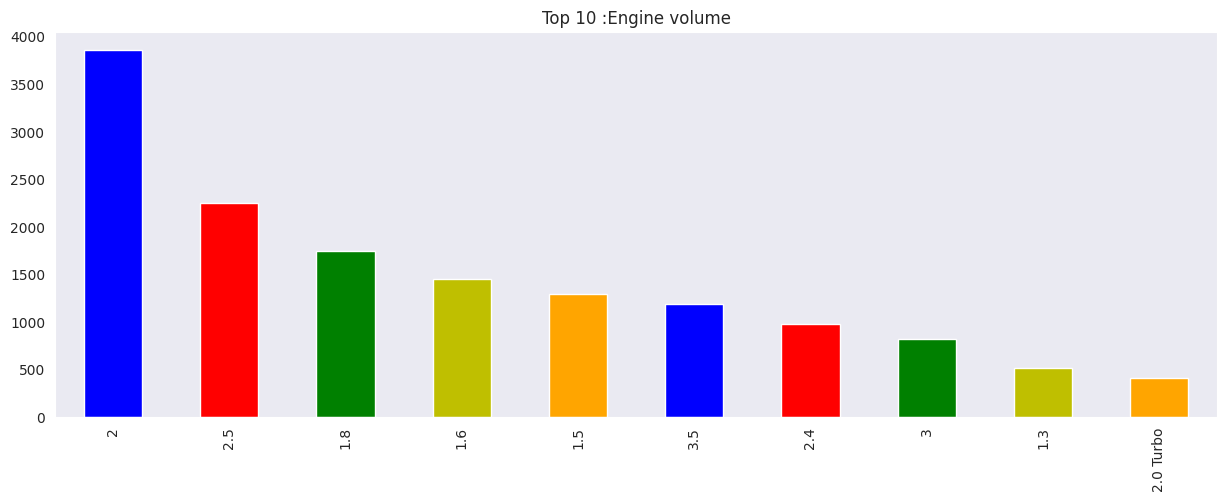

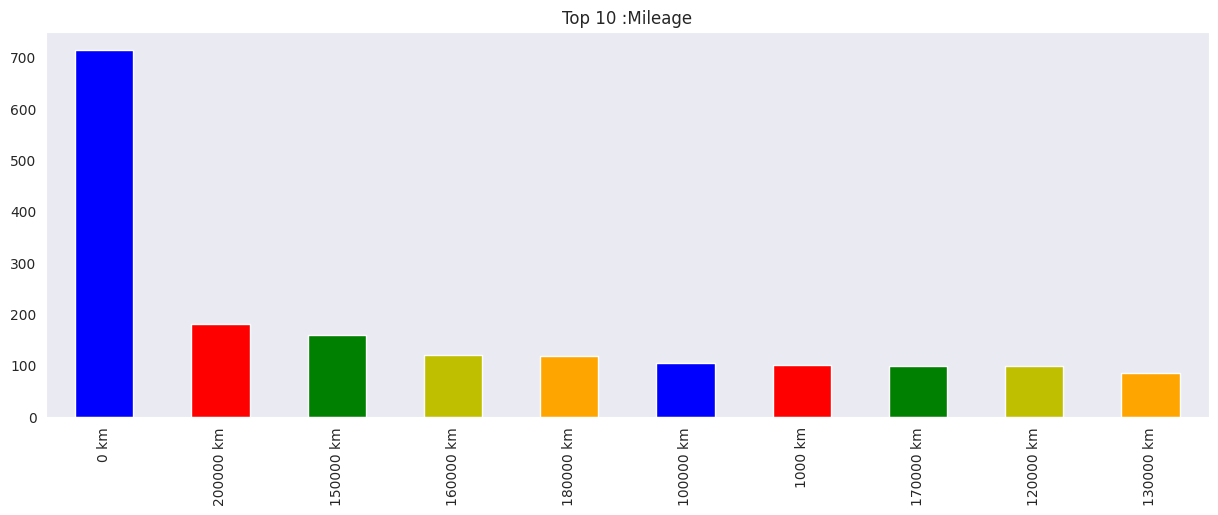

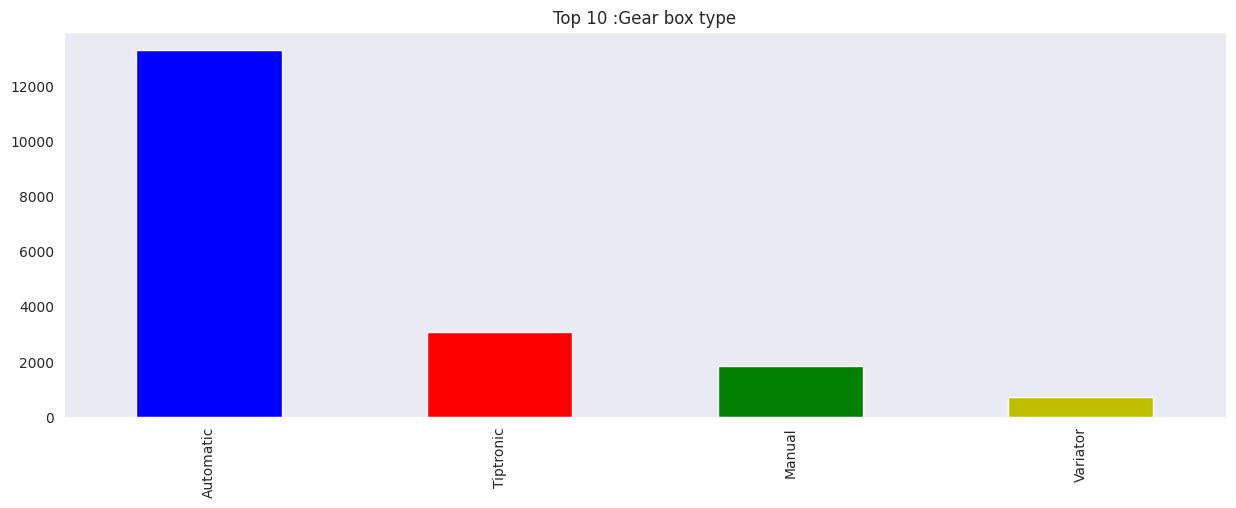

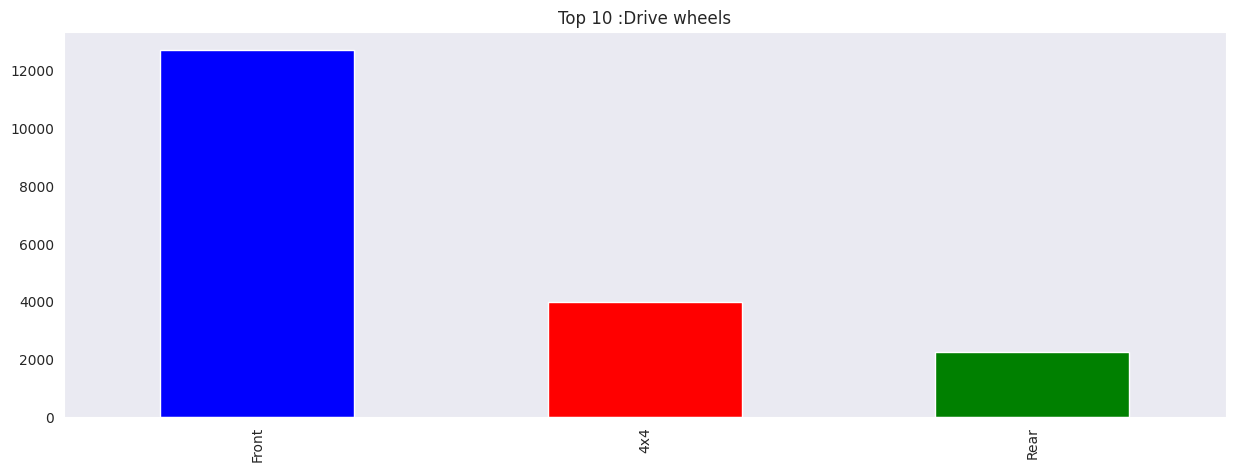

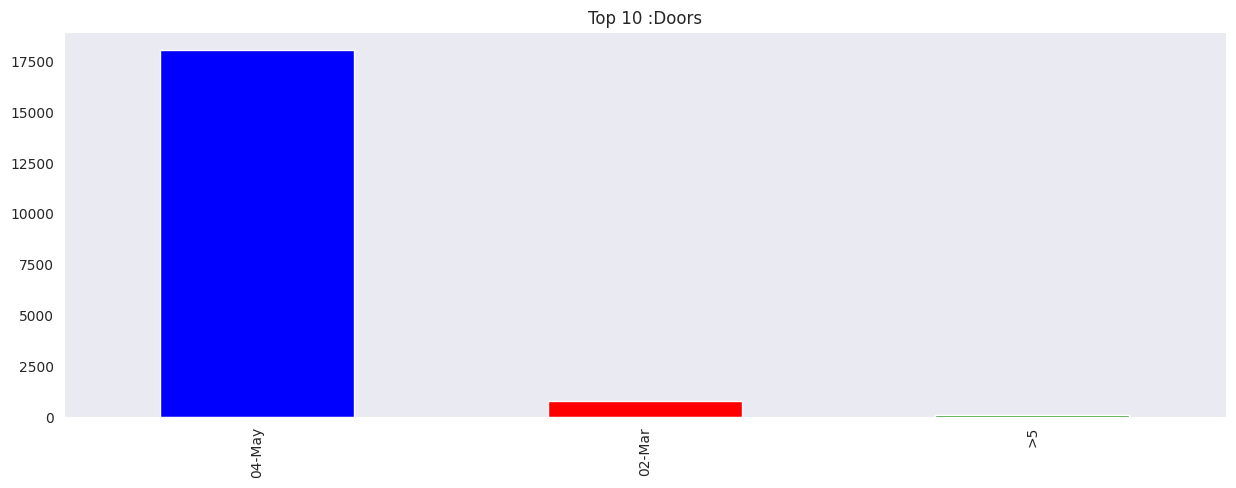

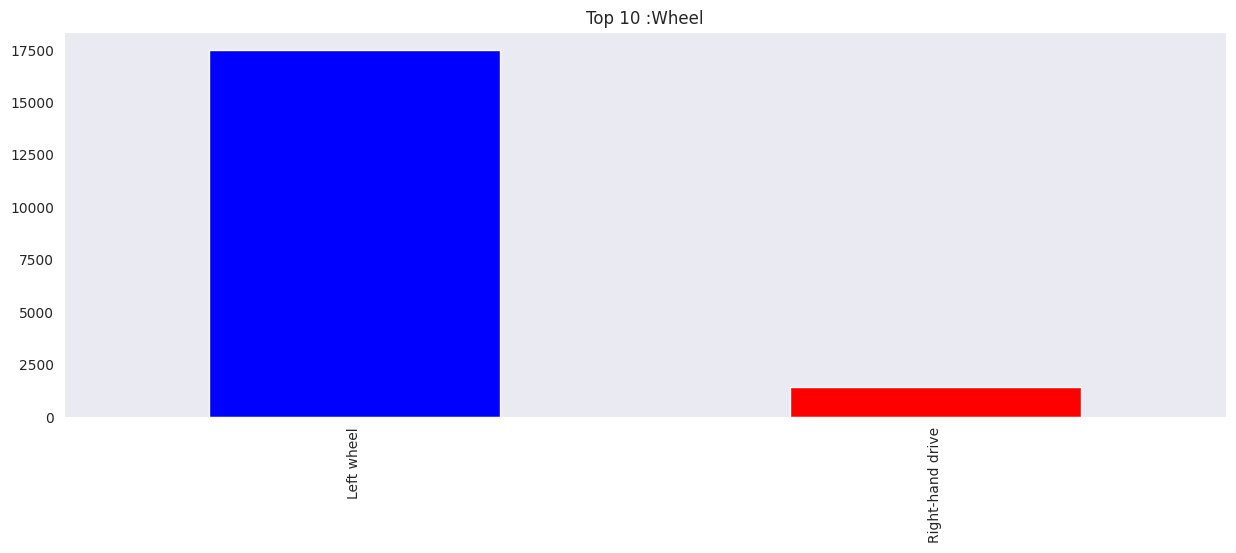

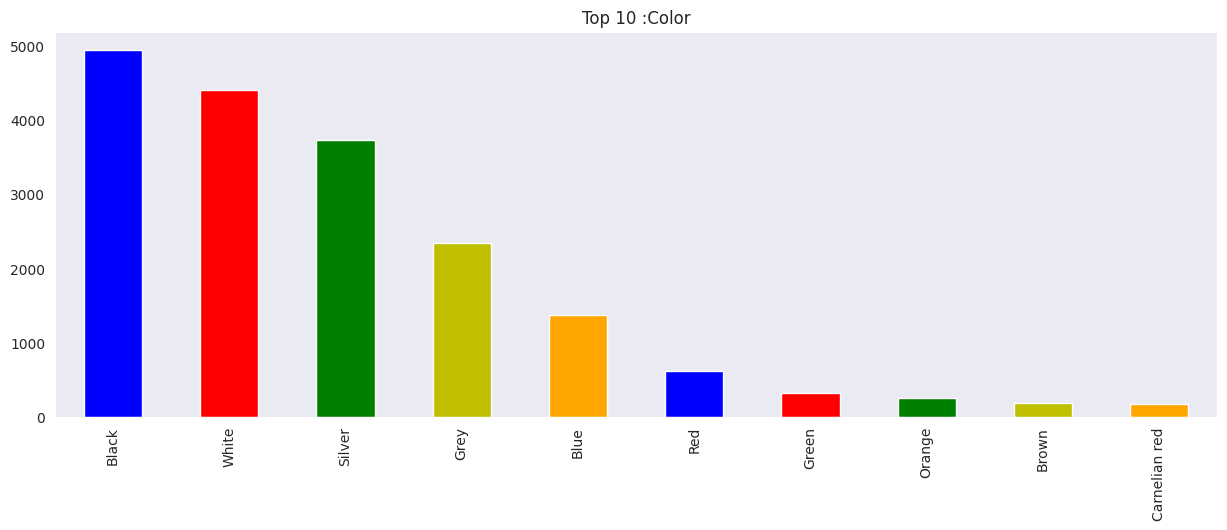

In [ ]:
for col in data_object :
  plt.figure(figsize=(15,5))
  top10= data[col].value_counts()[:10]
  colors = ["b","r","g","y","orange"]
  top10.plot(kind="bar",color=colors)
  plt.title( "Top 10 :" + col)
  plt.show()

**Data Processing**

In [ ]:
data=data.drop(["ID","Doors"],axis=1) #deleting unneccesery features


In [ ]:
import datetime   #Editing dates to be fit with today date
date= datetime.datetime.now()



In [ ]:
data["Age"]=date.year - data["Prod. year"]
data=data.drop(["Prod. year"],axis=1)


In [ ]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,9


In [ ]:
data["Levy"] = data["Levy"].replace("-", "0")  #replacing (-) in column levy with (0)
data["Levy"] = data["Levy"].astype(int) #converting to int

In [ ]:
data["Mileage"]=data["Mileage"].str.replace("km","")   #deleting word (km) from Mileage column
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9


In [ ]:
data["Engine volume"]= data["Engine volume"].str.replace("Turbo","") #deleting word (turpo) from Mileage column Engine volume
data["Engine volume"] = data["Engine volume"].astype(float) #converting to float

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memo

**Detecting Outliers**

In [ ]:
data_numeric = data.select_dtypes(exclude="object")
for col in data_numeric:
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr = q3-q1
  low = q1-1.5*iqr
  high = q3+1.5*iqr
  outlier = ((data_numeric[col]>high) | (data_numeric[col]<low)).sum()
  total = data_numeric[col].shape[0]
  print(f"Total outliers in {col} are : {outlier}---{round(100*(outlier)/total,2)}")
  if outlier > 0 :
    data=data.loc[(data[col]<=high) & ((data[col]>=low)) ]


Total outliers in Manufacturer are : 0---0.0
Total outliers in Model are : 0---0.0
Total outliers in Category are : 0---0.0
Total outliers in Leather interior are : 0---0.0
Total outliers in Fuel type are : 0---0.0
Total outliers in Mileage are : 0---0.0
Total outliers in Gear box type are : 0---0.0
Total outliers in Drive wheels are : 0---0.0
Total outliers in Wheel are : 0---0.0
Total outliers in Color are : 0---0.0
Total outliers in Price are : 0---0.0
Total outliers in Levy are : 0---0.0
Total outliers in Engine volume are : 0---0.0
Total outliers in Cylinders are : 0---0.0
Total outliers in Airbags are : 0---0.0
Total outliers in Age are : 0---0.0


Data Transforming

In [ ]:
dobject = data.select_dtypes(include= "object")
dnumeic = data.select_dtypes(exclude= "object")

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab= LabelEncoder()

In [ ]:
for i in range(0,dobject.shape[1]):
  dobject.iloc[:,i]=lab.fit_transform(dobject.iloc[:,i])


In [ ]:
data=pd.concat([dobject,dnumeic],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 4 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      6280 non-null   int64  
 1   Model             6280 non-null   int64  
 2   Category          6280 non-null   int64  
 3   Leather interior  6280 non-null   int64  
 4   Fuel type         6280 non-null   int64  
 5   Mileage           6280 non-null   int64  
 6   Gear box type     6280 non-null   int64  
 7   Drive wheels      6280 non-null   int64  
 8   Wheel             6280 non-null   int64  
 9   Color             6280 non-null   int64  
 10  Price             6280 non-null   int64  
 11  Levy              6280 non-null   int64  
 12  Engine volume     6280 non-null   float64
 13  Cylinders         6280 non-null   float64
 14  Airbags           6280 non-null   int64  
 15  Age               6280 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 83

**Creating Model**

In [ ]:
x= data.drop("Price",axis=1)
y= data["Price"].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,random_state=44)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_percentage_error


In [ ]:
algorithms = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","GradientBoostingRegressor","XGBRegressor","SVR"]
R2=[]
RMSE=[]
SCORE=[]


In [ ]:

def testing(model):
  model.fit(x_train,y_train)
  pred= model.predict(x_test)
  r2=r2_score(y_test,pred)
  rmse=np.sqrt(mean_squared_error(y_test,pred))
  score = model.score(x_test,y_test)
  R2.append(r2)
  RMSE.append(rmse)
  SCORE.append(score)
  print(f"Model score is {score}")


In [ ]:
model1= LinearRegression()
model2= DecisionTreeRegressor()
model3= RandomForestRegressor()
model4= GradientBoostingRegressor()
model5= XGBRegressor()
model6= SVR()

In [ ]:
testing(model1)
testing(model2)
testing(model3)
testing(model4)
testing(model5)
testing(model6)



Model score is 0.3537069531190321
Model score is 0.7788460424913392
Model score is 0.8636987309337631
Model score is 0.8122250028653493
Model score is 0.856709230951024
Model score is -0.013192928188931585


In [ ]:
Results= pd.DataFrame({"algorithms": algorithms ,"score": SCORE ,"r2": R2,"rmse": RMSE})
Results

,algorithms,score,r2,rmse
0,LinearRegression,0.353707,0.353707,10161.471171
1,DecisionTreeRegressor,0.778846,0.778846,5944.142404
2,RandomForestRegressor,0.863699,0.863699,4666.505664
3,GradientBoostingRegressor,0.812225,0.812225,5477.226864
4,XGBRegressor,0.856709,0.856709,4784.658593
5,SVR,-0.013193,-0.013193,12722.952989
